#### PREGUNTA SMART

¿Qué características sociodemográficas y de comportamiento de pago histórico de los asociados de Coomeva Cooperativa están más asociadas con la probabilidad de pago o impago, a partir del análisis exploratorio de datos?

## Desarrollo del proyecto

In [123]:
## Importamos las librerias necesarias ##

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
## Leemos la Base_Demografica de asociados ##

df = pd.read_csv("C:/Users/Usuario/Desktop/Data Science/AED/Proyecto/Data/Base_Demografica.csv", sep=",")

## información del df ##

print(list(df.columns))

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3540\2140587471.py:3: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/Usuario/Desktop/Data Science/AED/Proyecto/Data/Base_Demografica.csv", sep=",")


['str_periodo', 'codigo', 'fecha_ingreso', 'estado', 'nombre_estado', 'EDAD_CARTERA_INICIAL', 'EDAD_CARTERA_FINAL', 'fecha_retiro', 'oficina', 'tipo_vinculacion', 'nombre_tipo_vinculacion', 'estado_civil', 'personas_a_cargo', 'personas_a_cargo_menores_18', 'sexo', 'estrato', 'tipo_vivienda', 'nombre_tipo_vivienda', 'doc_corredor', 'nombre_promotor', 'nivel_academico', 'nombre_nivel_academico', 'fecha_nacimiento', 'ingresos', 'fecha_ingresos', 'egresos', 'titulo_obtenido', 'nombre_titulo_obtenido', 'ocupacion', 'nombre_ocupacion', 'ptaje_acierta', 'saldo_aportes', 'ind_inactivo', 'ingresos_deflactados', 'fecha_ingresos_deflactados', 'segmento_ingresos_vs_antiguedad', 'segmento_ciclo_de_vida', 'descripcion_oficina', 'regional', 'zona', 'dtm_fecha_insercion', 'dtm_fecha_creacion', 'edad', 'rango_edad', 'antiguedad_meses', 'antiguedad_anios', 'rango_antiguedad', 'rango_ingreso', 'rango_menores', 'rango_aportes', 'codigo_area_de_conocimiento', 'descripcion_area_de_conocimiento', 'circulo_pr

In [ ]:
# Mostramos la cantidad de registros que tiene la BD

df.shape

(268047, 125)

In [126]:
print(list(df.columns))

['str_periodo', 'codigo', 'fecha_ingreso', 'estado', 'nombre_estado', 'EDAD_CARTERA_INICIAL', 'EDAD_CARTERA_FINAL', 'fecha_retiro', 'oficina', 'tipo_vinculacion', 'nombre_tipo_vinculacion', 'estado_civil', 'personas_a_cargo', 'personas_a_cargo_menores_18', 'sexo', 'estrato', 'tipo_vivienda', 'nombre_tipo_vivienda', 'doc_corredor', 'nombre_promotor', 'nivel_academico', 'nombre_nivel_academico', 'fecha_nacimiento', 'ingresos', 'fecha_ingresos', 'egresos', 'titulo_obtenido', 'nombre_titulo_obtenido', 'ocupacion', 'nombre_ocupacion', 'ptaje_acierta', 'saldo_aportes', 'ind_inactivo', 'ingresos_deflactados', 'fecha_ingresos_deflactados', 'segmento_ingresos_vs_antiguedad', 'segmento_ciclo_de_vida', 'descripcion_oficina', 'regional', 'zona', 'dtm_fecha_insercion', 'dtm_fecha_creacion', 'edad', 'rango_edad', 'antiguedad_meses', 'antiguedad_anios', 'rango_antiguedad', 'rango_ingreso', 'rango_menores', 'rango_aportes', 'codigo_area_de_conocimiento', 'descripcion_area_de_conocimiento', 'circulo_pr

In [127]:
## Escogemos las columnas necesarias ## -- Estas columnas son las que consideramos importantes para nuestro Analisis ##

df = df[['nombre_estado','EDAD_CARTERA_INICIAL','EDAD_CARTERA_FINAL','nombre_tipo_vinculacion','estado_civil','personas_a_cargo','estrato',
         'nombre_tipo_vivienda','nombre_nivel_academico','ingresos','egresos','nombre_ocupacion','ptaje_acierta','edad','regional',
         'antiguedad_anios','suma_productos','saldo_aportes']]

df.head(5)

,nombre_estado,EDAD_CARTERA_INICIAL,EDAD_CARTERA_FINAL,nombre_tipo_vinculacion,estado_civil,personas_a_cargo,estrato,nombre_tipo_vivienda,nombre_nivel_academico,ingresos,egresos,nombre_ocupacion,ptaje_acierta,edad,regional,antiguedad_anios,suma_productos,saldo_aportes
0,Inactivo,6.0,6.0,Mayor 60,Casado,1,4,Propia,Profesional,2250000.0,NaN,Independiente,0,97,Bogota,26,2.0,"2728577,00"
1,Activo Normal,0.0,0.0,Mayor 60,Casado,0,5,Propia,Profesional,4500000.0,NaN,Independiente,0,94,Cali,55,5.0,"2052914,00"
2,Activo Cobranza Interna,0.0,1.0,Mayor 60,Casado,2,6,Desconocida,Profesional,4500000.0,NaN,Asalariado,0,93,Caribe,28,3.0,"6601225,00"
3,Activo Normal,0.0,0.0,Mayor 60,Casado,0,4,Propia,Ninguno,0.0,0.0,Pensionado - Jubilado,806,96,Bogota,13,0.0,"5563990,00"
4,Inactivo,5.0,5.0,Mayor 60,Casado,0,5,Propia,Ninguno,10500000.0,NaN,Asalariado,695,84,Medellin,12,0.0,NaN


## Tratamiento Outliers

In [128]:
## Vemos valores nulos x columna ##
valor_nulos = df.isna().sum()
valor_nulos

nombre_estado                   0
EDAD_CARTERA_INICIAL         4301
EDAD_CARTERA_FINAL           1721
nombre_tipo_vinculacion         0
estado_civil                    0
personas_a_cargo                0
estrato                         0
nombre_tipo_vivienda            0
nombre_nivel_academico          0
ingresos                        9
egresos                    148378
nombre_ocupacion                0
ptaje_acierta                   0
edad                            0
regional                        0
antiguedad_anios                0
suma_productos                  1
saldo_aportes                  67
dtype: int64

Según el resultado anterior, cada columna tiene 270.507 filas de datos, y existen cinco filas que contienen valores perdidos:

- "EDAD_CARTERA_INICIAL" -- Tiene 4.301 valores perdidos

- "EDAD_CARTERA_FINAL"   -- Tiene 1.721 valores perdidos

- "ingresos"             -- Tiene 9 valores perdidos

- "egresos"              -- Tiene 148.378 valores perdidos

- "suma_producto"        -- Tiene 1 valor perdido


## Manejo valores perdidos

In [129]:
## Columna edad cartera inicial y edad cartera final ##

## Si no tiene edad de cartera, según el dominio de la facturacion de la empresa, se encontró que el asociado en cuestión no tenia nada
## Facturado, por lo tanto se decide rellenar los vacios con 0

df['EDAD_CARTERA_INICIAL'] = df['EDAD_CARTERA_INICIAL'].fillna(0)
df['EDAD_CARTERA_FINAL'] = df['EDAD_CARTERA_FINAL'].fillna(0)

print('valores unicos edad inicial:',df['EDAD_CARTERA_INICIAL'].unique()) ## Para validar que el cambio quedo hecho
print('valores unicos edad final:',df['EDAD_CARTERA_FINAL'].unique()) ## Para validar que el cambio quedo hecho

valores unicos edad inicial: [6. 0. 5. 1. 3. 4. 2. 7.]
valores unicos edad final: [6. 0. 1. 5. 4. 3. 7. 2.]


In [130]:
## Columna egresos ##

## Al validar que tiene tantos registros nulos (55% de las filas) se decide eliminar esta columna del df #

df = df.drop(columns="egresos")
df.columns ## validar que haya quedado la eliminacion

Index(['nombre_estado', 'EDAD_CARTERA_INICIAL', 'EDAD_CARTERA_FINAL',
       'nombre_tipo_vinculacion', 'estado_civil', 'personas_a_cargo',
       'estrato', 'nombre_tipo_vivienda', 'nombre_nivel_academico', 'ingresos',
       'nombre_ocupacion', 'ptaje_acierta', 'edad', 'regional',
       'antiguedad_anios', 'suma_productos', 'saldo_aportes'],
      dtype='object')

In [131]:
## Columna suma producto ## Al ser solo 1 valor, se decide rellenar con el promedio de la columna

df['suma_productos'] = df['suma_productos'].fillna(int(df['suma_productos'].mean()))
df['suma_productos'].unique() ## validar el resultado

array([ 2.,  5.,  3.,  0.,  1.,  4.,  9.,  7.,  6., 10.,  8., 11., 12.,
       13., 14., 16., 15., 19., 18., 17., 20., 23., 21., 22., 25.])

In [132]:
## Columna Saldo aportes ## Al ser solo 67 valores, se decide eliminar las filas donde saldo aportes es null##

df.dropna(subset=['saldo_aportes'],inplace=True)

In [133]:
## columna ingresos ##
## Al validar que no son muchos los registros nulos, se decide eliminar las filas nulas ## -- Son 9

df = df.dropna(subset = ['ingresos'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 267971 entries, 0 to 268046
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   nombre_estado            267971 non-null  object 
 1   EDAD_CARTERA_INICIAL     267971 non-null  float64
 2   EDAD_CARTERA_FINAL       267971 non-null  float64
 3   nombre_tipo_vinculacion  267971 non-null  object 
 4   estado_civil             267971 non-null  object 
 5   personas_a_cargo         267971 non-null  int64  
 6   estrato                  267971 non-null  object 
 7   nombre_tipo_vivienda     267971 non-null  object 
 8   nombre_nivel_academico   267971 non-null  object 
 9   ingresos                 267971 non-null  float64
 10  nombre_ocupacion         267971 non-null  object 
 11  ptaje_acierta            267971 non-null  int64  
 12  edad                     267971 non-null  int64  
 13  regional                 267971 non-null  object 
 14  antigueda

In [134]:
## La variable saldo_aportes aparece como objeto -- Debe ser pasada a numerico ##

df['saldo_aportes']= df['saldo_aportes'].str.replace(",",".").astype("float64")

## Manejo de Outliers ##

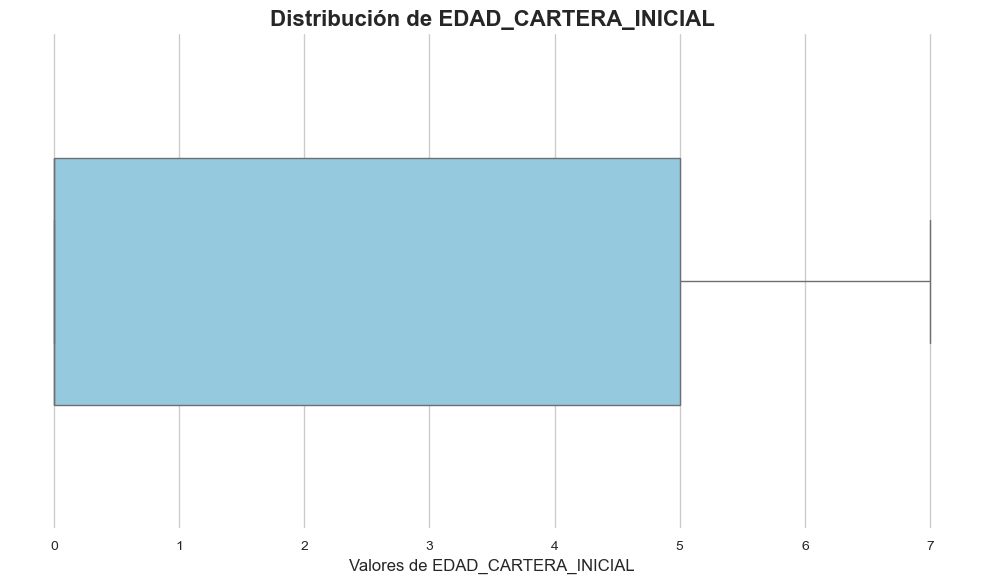

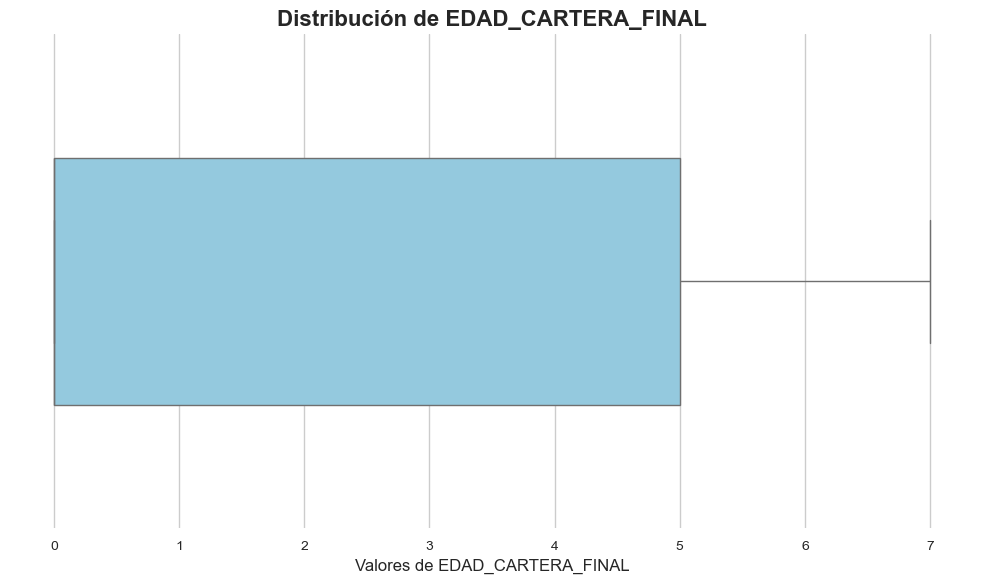

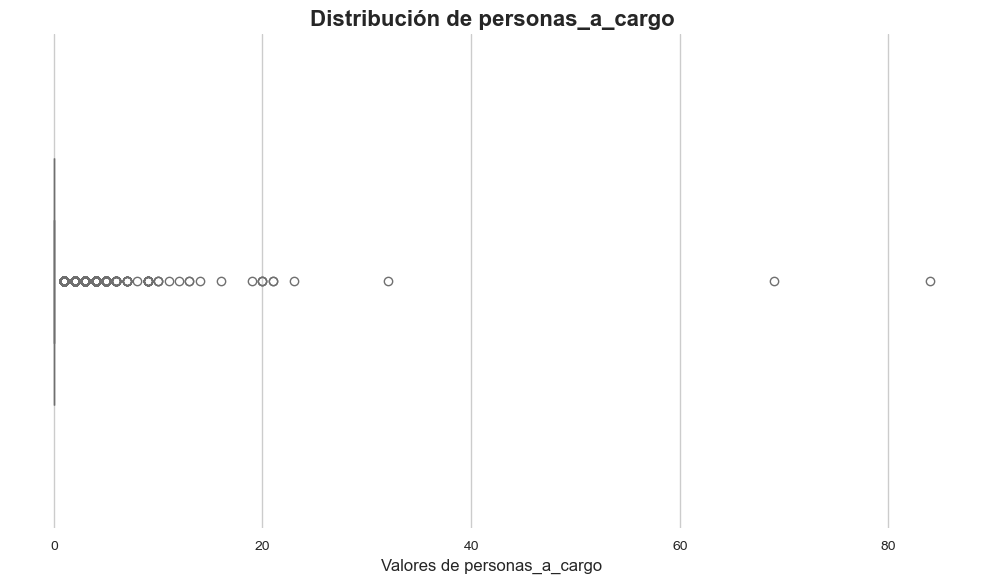

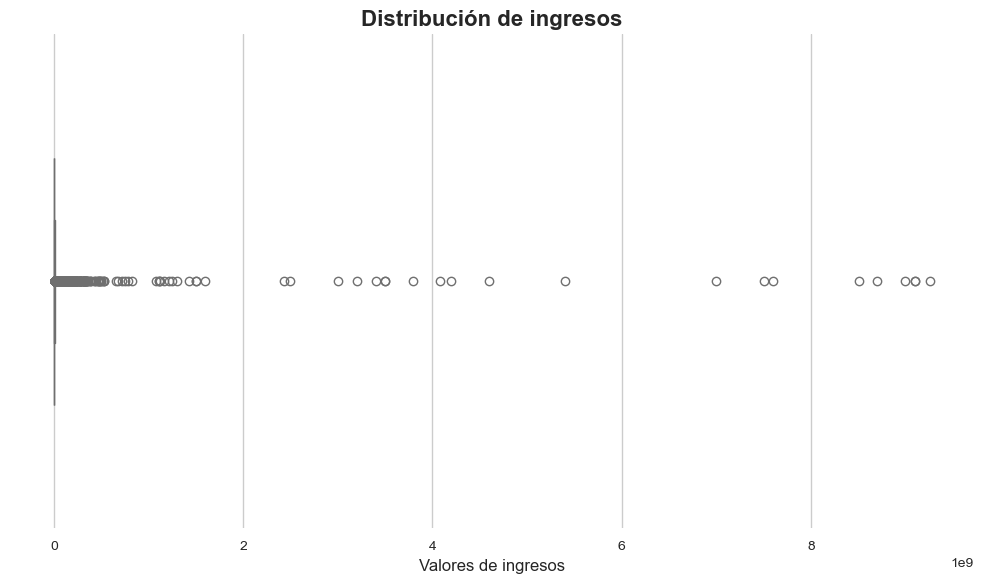

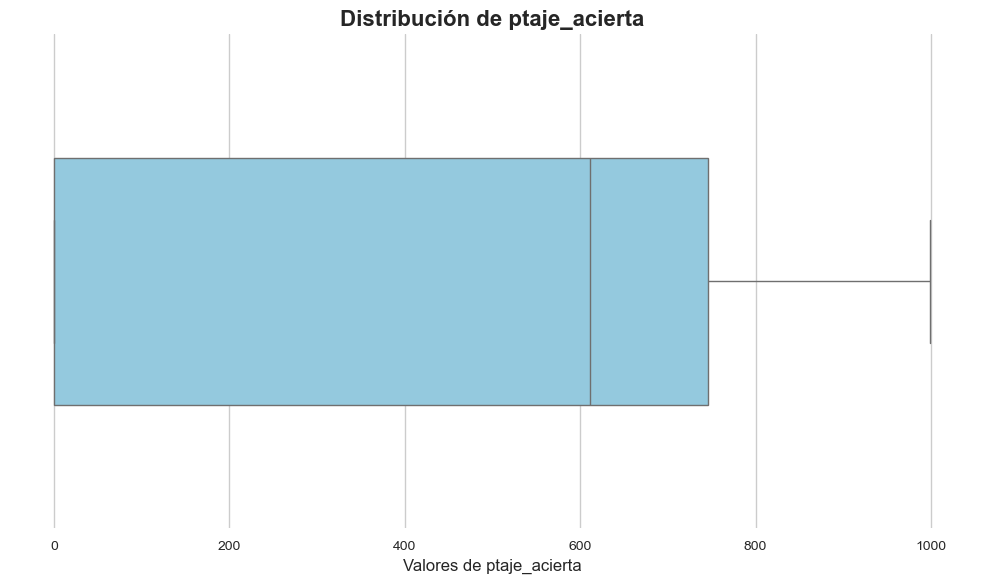

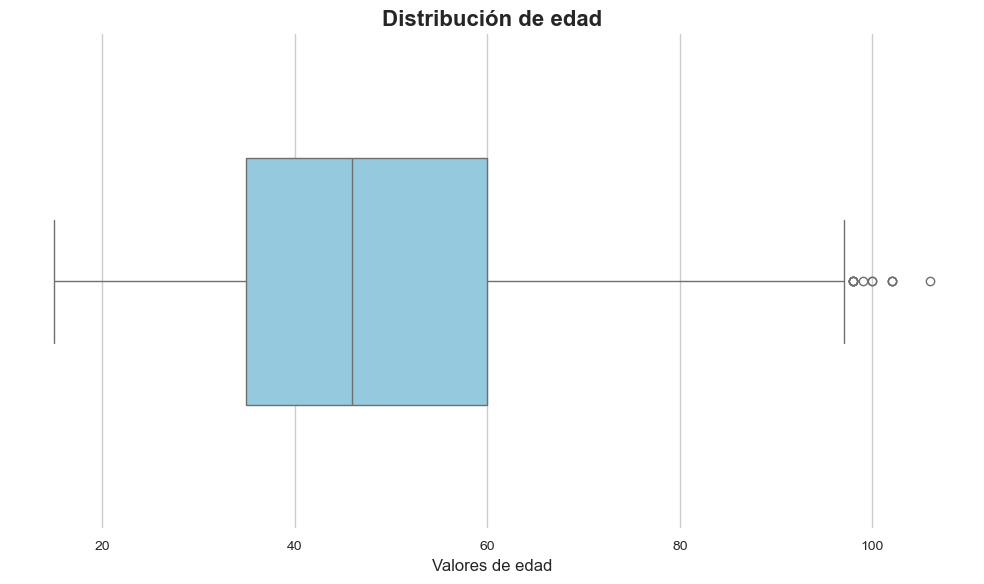

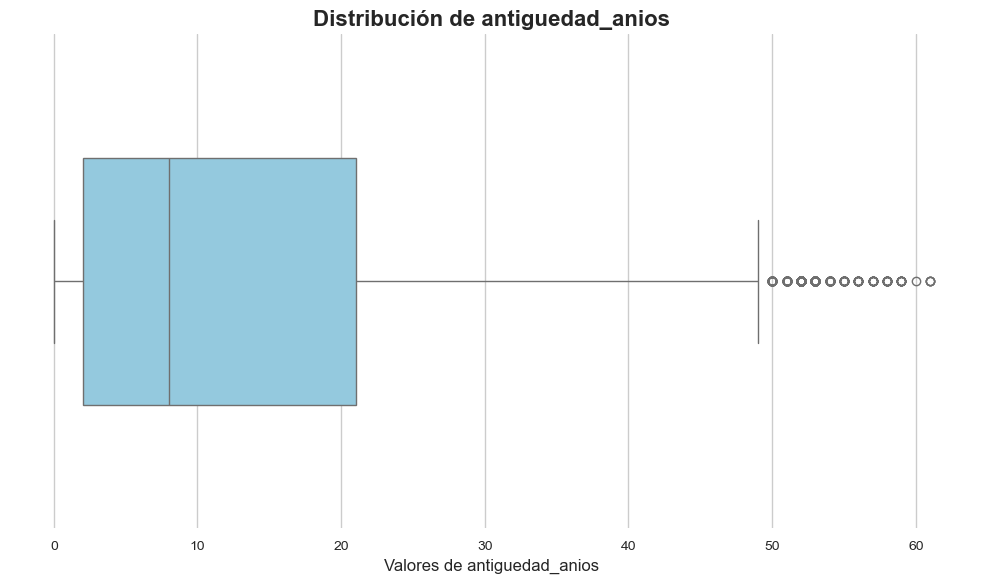

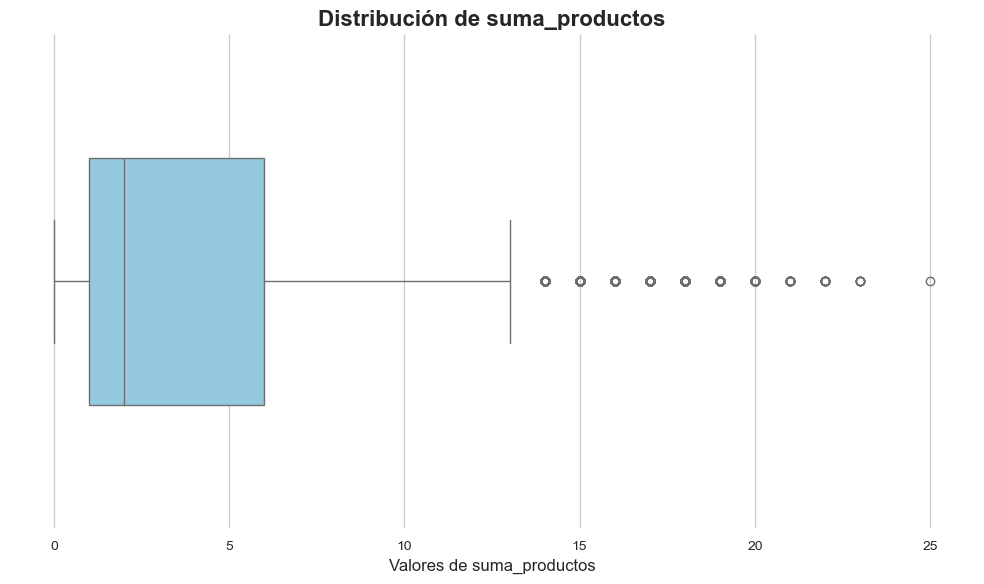

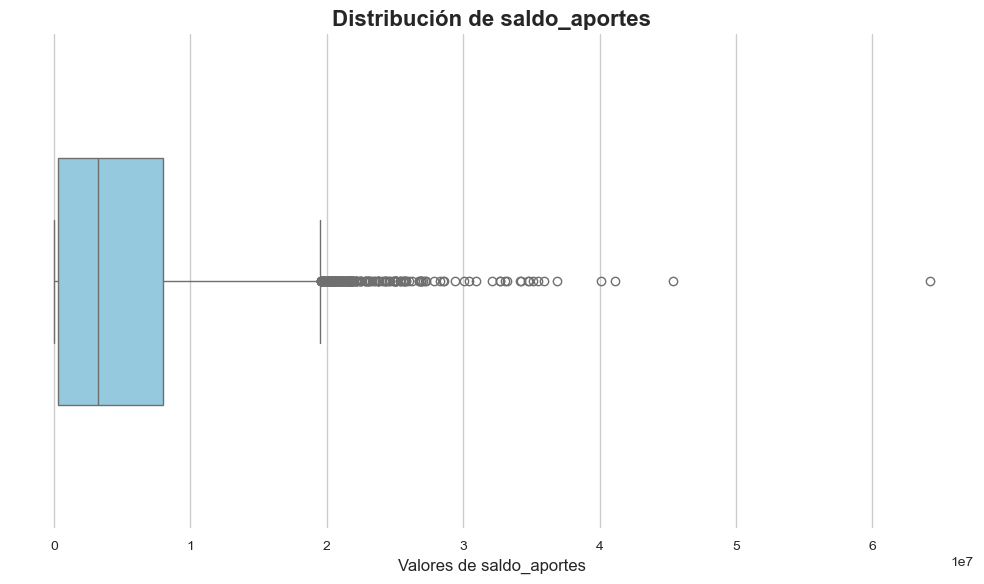

In [135]:
## nos traemos las columnas numericas ##

numericas = df.select_dtypes('number')

sns.set_style('whitegrid') 
plt.rc('axes', titlesize=14) 
plt.rc('axes', labelsize=12) 
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

for col in numericas.columns:
    
    
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.boxplot(x=col, data=numericas, ax=ax, color='skyblue', width=0.5) 
    ax.set_title(f'Distribución de {col}', fontsize=16, fontweight='bold')
    ax.set_xlabel(f'Valores de {col}', fontsize=12)
    sns.despine(left=True, bottom=True)
    plt.tight_layout()
    plt.show()

In [136]:
for col in numericas.columns: # loop for para cuantificar la cantidad de nulos dentro de cada columna
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1

    outliers = df[col][(df[col] < (q1 - 1.5 * IQR)) | (df[col] > (q3 + 1.5 * IQR))]

    print(f'número de outliers columna {col}: {len(outliers)}')

número de outliers columna EDAD_CARTERA_INICIAL: 0
número de outliers columna EDAD_CARTERA_FINAL: 0
número de outliers columna personas_a_cargo: 37174
número de outliers columna ingresos: 21286
número de outliers columna ptaje_acierta: 0
número de outliers columna edad: 12
número de outliers columna antiguedad_anios: 456
número de outliers columna suma_productos: 4059
número de outliers columna saldo_aportes: 196


## Variables que no necesitan tratamiento de Outliers ##

- Edad de cartera Final e Inicial no necesitan tratamiento.

- La variable puntaje acierta no necesita tratamiento.

## Tratamiento de Outliers ##

In [137]:
## Columna eddad ## -- Al ser tan pocos valores extremos, se eliminan del df ##

df = df[df['edad']  <= (df['edad'].quantile(0.75) + 1.5 * (df['edad'].quantile(0.75) - df['edad'].quantile(0.25)))]

df['edad'].max()

97

In [138]:
## Vamos a generar el mismo tratamiento para la columna antinguedad en años ##

df = df[df['antiguedad_anios'] <= (df['antiguedad_anios'].quantile(0.75) + 1.5 * (df['antiguedad_anios'].quantile(0.75) - df['antiguedad_anios'].quantile(0.25)))]

df['antiguedad_anios'].max()

49

In [139]:
## Generamos el mismo tratamiento anterior a la variable saldo_aportes, ya que los outliers son solo 167 ##

df = df[df['saldo_aportes'] <= (df['saldo_aportes'].quantile(0.75) + 1.5 * (df['saldo_aportes'].quantile(0.75) - df['saldo_aportes'].quantile(0.25)))]

df['saldo_aportes'].max()

19509166.0

## Variable Personas a cargo

In [140]:
## Validamos la proporción de los valores unicos de la variable ##

df['personas_a_cargo'].value_counts(normalize=True)

personas_a_cargo
0     0.861761
1     0.099146
2     0.029965
3     0.006924
4     0.001609
5     0.000352
6     0.000086
9     0.000049
7     0.000034
20    0.000011
10    0.000011
13    0.000007
21    0.000007
32    0.000004
11    0.000004
16    0.000004
14    0.000004
69    0.000004
12    0.000004
19    0.000004
23    0.000004
84    0.000004
8     0.000004
Name: proportion, dtype: float64

In [141]:
## Debido a que el 86% de la columna presenta valor 0 y que hay datos atipicos que dan a inferir que la columna no es confiable
## Se toma la decisión de eliminar la columna
df.drop('personas_a_cargo', axis=1,inplace=True)

df.columns

Index(['nombre_estado', 'EDAD_CARTERA_INICIAL', 'EDAD_CARTERA_FINAL',
       'nombre_tipo_vinculacion', 'estado_civil', 'estrato',
       'nombre_tipo_vivienda', 'nombre_nivel_academico', 'ingresos',
       'nombre_ocupacion', 'ptaje_acierta', 'edad', 'regional',
       'antiguedad_anios', 'suma_productos', 'saldo_aportes'],
      dtype='object')

## Variable Ingresos

In [ ]:
## Se decide eliminar todos los outliers ##

df = df[df['ingresos']  <= (df['ingresos'].quantile(0.75) + 1.5 * (df['ingresos'].quantile(0.75) - df['ingresos'].quantile(0.25)))]

df['ingresos'].max()

14310000.0

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246064 entries, 0 to 268045
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   nombre_estado            246064 non-null  object 
 1   EDAD_CARTERA_INICIAL     246064 non-null  float64
 2   EDAD_CARTERA_FINAL       246064 non-null  float64
 3   nombre_tipo_vinculacion  246064 non-null  object 
 4   estado_civil             246064 non-null  object 
 5   estrato                  246064 non-null  object 
 6   nombre_tipo_vivienda     246064 non-null  object 
 7   nombre_nivel_academico   246064 non-null  object 
 8   ingresos                 246064 non-null  float64
 9   nombre_ocupacion         246064 non-null  object 
 10  ptaje_acierta            246064 non-null  int64  
 11  edad                     246064 non-null  int64  
 12  regional                 246064 non-null  object 
 13  antiguedad_anios         246064 non-null  int64  
 14  suma_prod

Una vez tratados los valores nulos y los valores extremos (outliers), resulto un df de 246.064 filas no nulas, estas serán usadas para el análisis bivariado a continuación

## Analisis Bivariado

In [144]:
## Definimos pago o no ## Si el asociado termina con una edad de mora 0, es decir, termina al dia, se deja como 1 en caso contrario 0

df['Pago'] = np.where(df['EDAD_CARTERA_FINAL'] == 0, 1, 0) 

df['Pago'].unique()

array([0, 1])

### Matriz de Correlación 

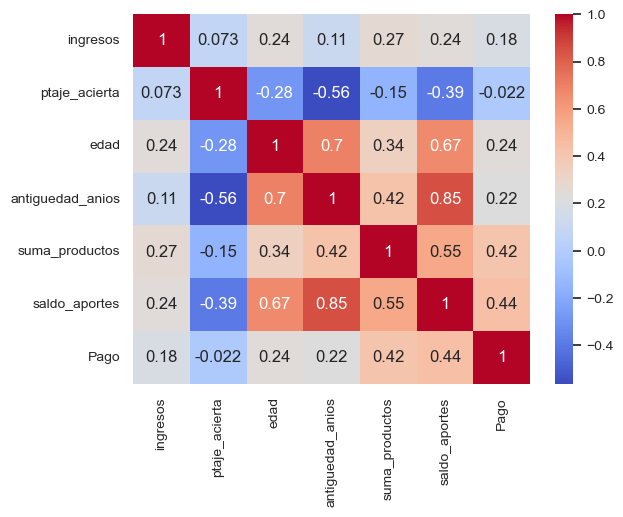

In [ ]:
## Vamos a generar el analisis Bibariado ##
## Se genera la matriz de correlación para identificar aqullas variables que tienen mayor correlación con el target

df = df.drop(columns=['EDAD_CARTERA_FINAL','EDAD_CARTERA_INICIAL'])

matriz_correlaciones = df.select_dtypes('number').corr(method='spearman')

matriz_correlaciones

sns.heatmap(matriz_correlaciones, cmap='coolwarm', annot=True)

plt.show()

  Las variables con mayor correlación son:
  
 -  saldo_aportes, 
 -  suma_productos 
 -  ingresos

## Analisis bibariado saldo_aportes

In [146]:
## Dejaremos a saldo aportes expresado en millones de pesos ##

df['saldo_aportes'] = df['saldo_aportes'] / 1000000

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3540\623871533.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


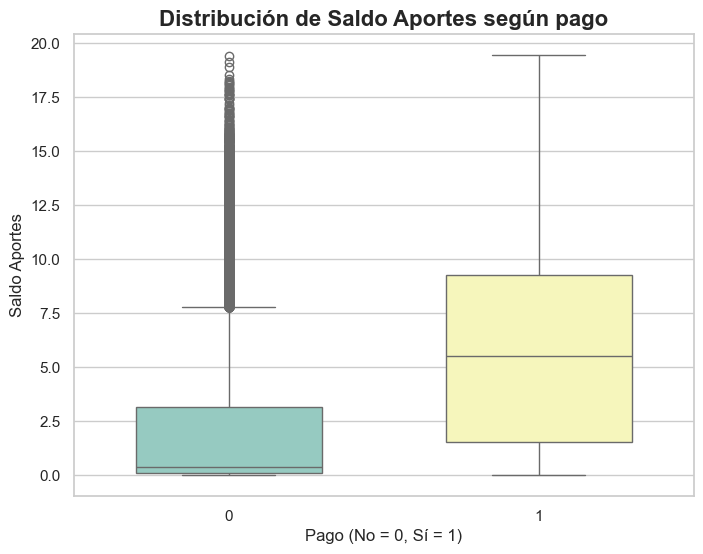

In [ ]:
# Generamos un boxplot para evidenciar la distribución de saldo_aportes segun el pago
sns.set(style="whitegrid")

plt.figure(figsize=(8,6))


sns.boxplot(
    x='Pago',
    y='saldo_aportes',
    data=df,
    palette='Set3',  
    width=0.6
)

plt.title('Distribución de Saldo Aportes según pago', fontsize=16, weight='bold')
plt.xlabel('Pago (No = 0, Sí = 1)', fontsize=12)
plt.ylabel('Saldo Aportes', fontsize=12)

plt.show()

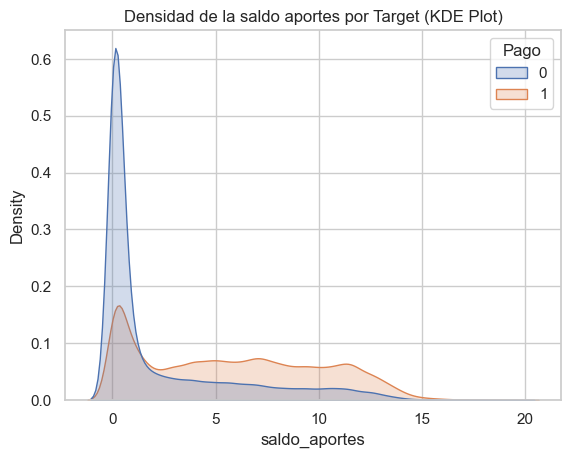

In [ ]:
# Realizamos gráfico de densidad superpuesto
sns.kdeplot(data=df, x='saldo_aportes', hue='Pago', fill=True, common_norm=False)
plt.title('Densidad de la saldo aportes por Target (KDE Plot)')
plt.show()

In [149]:
## Tabla de frecuencias ##

table_aportes = df.groupby('Pago').agg(Qasociados =('saldo_aportes','size'),
                                       media_aportes = ('saldo_aportes','mean'),
                                       desv_estandar = ('saldo_aportes','std'),
                                       aportes_max = ('saldo_aportes','max'),
                                       aportes_min = ('saldo_aportes','min')).reset_index()

table_aportes

,Pago,Qasociados,media_aportes,desv_estandar,aportes_max,aportes_min
0,0,103274,2.262652,3.481383,19.397889,0.0
1,1,142790,5.757494,4.268047,19.447754,0.0


- En general, mediante el análisis gráfico y la tabla de frecuencia, se encuentra que las personas que tienden a pagar dentro del mes, tienen un saldo (ahorros dentro de la cooperativa) más alto que los que no pagan.

- Al notar este patrón (escalera), es decir, mayor saldo aporte, mayor densidad de personas que pagan, se puede concluir que la variable saldo aportes sería un buen regresor en un análisis de clasificación.

## Variable Suma Producto

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3540\2279203820.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


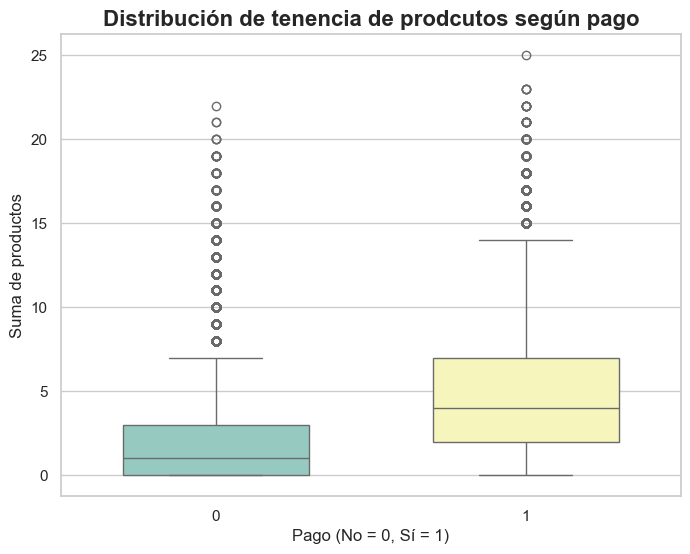

In [ ]:
# # Generamos un boxplot para evidenciar la distribución de tenencia de productos segun el pago
sns.set(style="whitegrid")

plt.figure(figsize=(8,6))

sns.boxplot(
    x='Pago',
    y='suma_productos',
    data=df,
    palette='Set3',  
    width=0.6
)

plt.title('Distribución de tenencia de prodcutos según pago', fontsize=16, weight='bold')
plt.xlabel('Pago (No = 0, Sí = 1)', fontsize=12)
plt.ylabel('Suma de productos', fontsize=12)

plt.show()

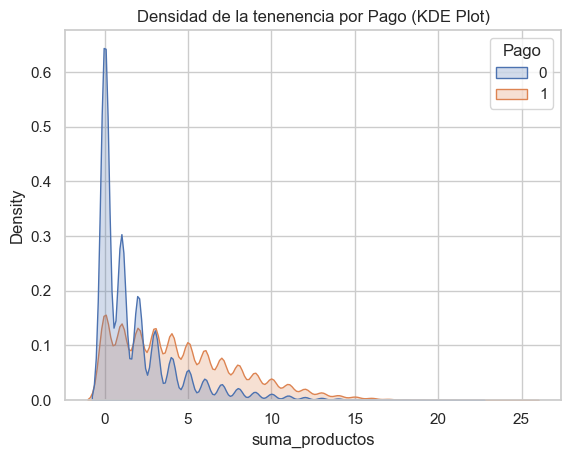

In [ ]:
# Generamos un gráfico de densidad superpuesto
sns.kdeplot(data=df, x='suma_productos', hue='Pago', fill=True, common_norm=False)
plt.title('Densidad de la tenenencia por Pago (KDE Plot)')
plt.show()

In [152]:
## Tabla de frecuencias ##

table_suma_productos = df.groupby('Pago').agg(Qasociados =('suma_productos','size'),
                                       media_productos = ('suma_productos','mean'),
                                       desv_estandar = ('suma_productos','std'),
                                       prudctos_max = ('suma_productos','max'),
                                       productos_min = ('suma_productos','min')).reset_index()

table_suma_productos

,Pago,Qasociados,media_productos,desv_estandar,prudctos_max,productos_min
0,0,103274,1.820294,2.573750,22.0,0.0
1,1,142790,4.473065,3.647537,25.0,0.0


- En general, mediante el análisis gráfico y la tabla de frecuencia, se encuentra que las personas que tienden a pagar dentro del mes, tienen un mayor número de productos que los asociados que tienden a no pagar. Validando la densidad de la variable según pago, encontramos que la gran mayoría de asociados que no pagan se encuentran en un rango entre 0 y 2 productos, por otro lado, los que si tienden a pagar tienen mayor densidad en valores superiores a 3 y a medida que la suma de productos aumenta se hace más representativa la densidad de la clase 1(pago).

- Al notar este patrón (escalera), es decir, mayor suma de productos, mayor densidad de personas que pagan, se puede concluir que la variable suma de productos sería un buen regresor en un análisis de clasificación.

## Variable Ingresos

In [153]:
## Dejaremos a ingresos expresado en millones de pesos ##

df['ingresos'] = df['ingresos'] / 1000000

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3540\4282727308.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


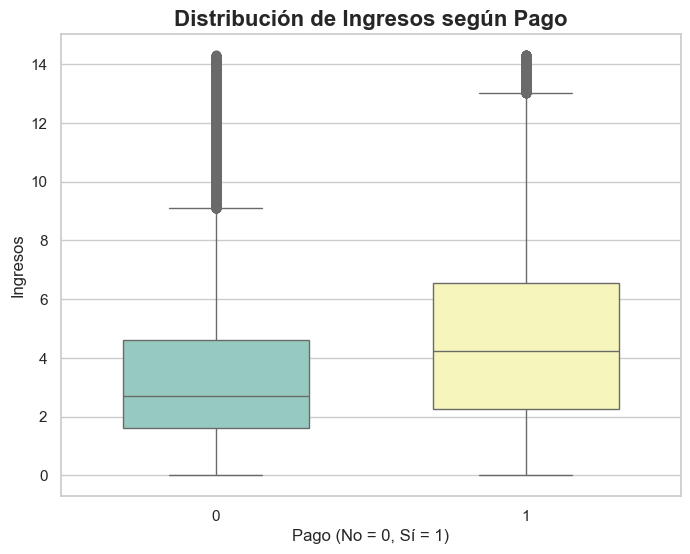

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# # Generamos un boxplot para evidenciar la distribución de ingresos segun el pago
sns.set(style="whitegrid")

plt.figure(figsize=(8,6))

sns.boxplot(
    x='Pago',
    y='ingresos',
    data=df,
    palette='Set3',  
)

plt.title('Distribución de Ingresos según Pago', fontsize=16, weight='bold')
plt.xlabel('Pago (No = 0, Sí = 1)', fontsize=12)
plt.ylabel('Ingresos', fontsize=12)

plt.show()

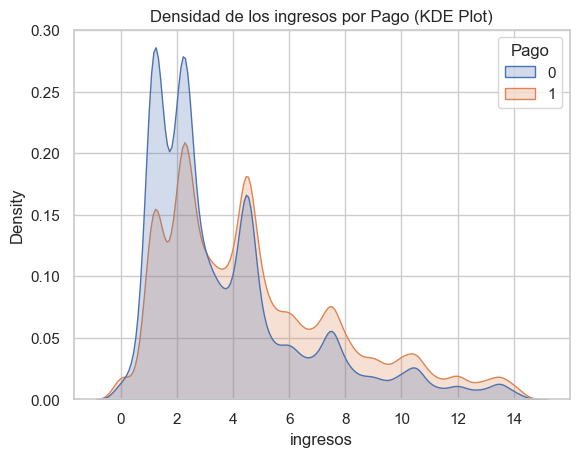

In [ ]:
# Generamos un Gráfico de densidad superpuesto
sns.kdeplot(data=df, x='ingresos', hue='Pago', fill=True, common_norm=False)
plt.title('Densidad de los ingresos por Pago (KDE Plot)')
plt.show()

In [156]:
## Tabla de frecuencias ##

table_ingresos = df.groupby('Pago').agg(Qasociados =('ingresos','size'),
                                       media_ingresos = ('ingresos','mean'),
                                       desv_estandar = ('ingresos','std'),
                                       ingresos_max = ('ingresos','max'),
                                       ingresos_min = ('ingresos','min')).reset_index()

table_ingresos

,Pago,Qasociados,media_ingresos,desv_estandar,ingresos_max,ingresos_min
0,0,103274,3.745090,2.856211,14.306,0.0
1,1,142790,4.756218,3.153481,14.310,0.0


- En general, mediante el análisis gráfico y la tabla de frecuencia, se encuentra que las personas que tienden a pagar dentro del mes, tienen un mayor ingreso que aquellos que tienden a no pagar. Validando la densidad de la variable ingresos según la categoría, nos encontramos que la mayor proporción de los asociados que no pagan tienen ingresos bajos (o a 2 millones), a medida que va creciendo la variable ingresos, la categoría 1 (pago) gana mayor densidad.

- Al notar este patrón (escalera), es decir, mayores ingresos, mayor densidad de personas que pagan, se puede concluir que la variable ingresos sería un buen regresor en un análisis de clasificación.

En esta etapa se presentan las columnas disponibles en el DataFrame, las cuales constituyen la base de información con la que se llevará a cabo el análisis. De esta manera, se asegura una adecuada comprensión del conjunto de datos antes de avanzar a etapas más complejas del trabajo.

In [157]:
df.columns

Index(['nombre_estado', 'nombre_tipo_vinculacion', 'estado_civil', 'estrato',
       'nombre_tipo_vivienda', 'nombre_nivel_academico', 'ingresos',
       'nombre_ocupacion', 'ptaje_acierta', 'edad', 'regional',
       'antiguedad_anios', 'suma_productos', 'saldo_aportes', 'Pago'],
      dtype='object')

- Realizamos una serie de pruebas de chi-cuadrado para las variables categóricas tratando de identificar cuáles de ellas tienen una relación estadísticamente significativa con la variable objetivo "Pago".

- Si el p-valor es bajo (generalmente por debajo de un umbral como 0.05), se concluye que existe una asociación estadísticamente significativa entre las dos variables


In [158]:
import pandas as pd
from scipy.stats import chi2_contingency

for col in ['nombre_estado', 'nombre_tipo_vinculacion','estado_civil',
            'nombre_tipo_vivienda','nombre_nivel_academico',
            'nombre_ocupacion','regional']:
    tabla = pd.crosstab(df[col], df['Pago'])
    chi2, p, _, _ = chi2_contingency(tabla)
    print(f"{col} → p-value = {p}")

nombre_estado → p-value = 0.0
nombre_tipo_vinculacion → p-value = 0.0
estado_civil → p-value = 0.0
nombre_tipo_vivienda → p-value = 0.0
nombre_nivel_academico → p-value = 0.0
nombre_ocupacion → p-value = 0.0
regional → p-value = 0.0


En el siguiente paso se busca calcular la correlación biseral-puntual entre las variables numéricas y categóricas:

 - Si el p-valor es bajo (generalmente < 0.05), la correlación es significativa, lo que sugiere que la variable numérica tiene una relación real con la probabilidad de que una persona realice el Pago.

 - Si el p-valor es alto, la correlación no es significativa.

In [ ]:
from scipy.stats import pointbiserialr

num_var = df.select_dtypes('number')

for col in num_var:
    corr, p = pointbiserialr(df[col], df['Pago'])
    print(f"{col} → correlación = {corr:.3f}, p-value = {p}")

ingresos → correlación = 0.162, p-value = 0.0
ptaje_acierta → correlación = -0.095, p-value = 0.0
edad → correlación = 0.237, p-value = 0.0
antiguedad_anios → correlación = 0.256, p-value = 0.0
suma_productos → correlación = 0.375, p-value = 0.0
saldo_aportes → correlación = 0.400, p-value = 0.0
Pago → correlación = 1.000, p-value = 0.0


Se calcula el (VIF) Factor de Inflación de la Varianza para las variables numéricas, ayudando a identificar y, potencialmente, eliminar algunas redundantes.

El valor del VIF indica qué tan inflada está la varianza de un coeficiente de regresión debido a su correlación con otras variables predictoras.

- VIF = 1: No hay correlación entre la variable y las otras variables predictoras.

- 1 < VIF < 5: La correlación es moderada. Generalmente se considera aceptable.

- VIF ≥ 5 o 10: Indica una alta multicolinealidad. Esto significa que la variable está fuertemente correlacionada con una o más de las otras variables, lo que puede causar problemas en un modelo de regresión

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df[num_var.columns.tolist()]  # solo numéricas por ahora
X = add_constant(X)

vif = pd.DataFrame()
vif["feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

            feature        VIF
0             const  18.124430
1          ingresos   1.123887
2     ptaje_acierta   2.106865
3              edad   2.268870
4  antiguedad_anios   7.322468
5    suma_productos   1.450124
6     saldo_aportes   4.871810
7              Pago   1.312637


In [161]:
df.columns

Index(['nombre_estado', 'nombre_tipo_vinculacion', 'estado_civil', 'estrato',
       'nombre_tipo_vivienda', 'nombre_nivel_academico', 'ingresos',
       'nombre_ocupacion', 'ptaje_acierta', 'edad', 'regional',
       'antiguedad_anios', 'suma_productos', 'saldo_aportes', 'Pago'],
      dtype='object')

Interpretando algunos de los resultados aplicados en las anteriores celdas de código, se opta por eliminar las siguientes columnas:

- ptje_acierta - No muestra relación con el target
- nombre_estado - Esta variablo es identificadora
- nombre_tipo_vinculacion - Está relacionada con las profesiones y ocupación del asociado
- regional - Es un identificador de la regional en la que se encuentra
- antiguedad_anios - Esta altamente correlacionada con saldo_aportes (mayor cantidad de años, mayor saldo ahorrado en aportes)

In [162]:
df_final = df.drop(columns=['ptaje_acierta',"nombre_estado","nombre_tipo_vinculacion","regional","antiguedad_anios"])

In [163]:
df_final.columns

Index(['estado_civil', 'estrato', 'nombre_tipo_vivienda',
       'nombre_nivel_academico', 'ingresos', 'nombre_ocupacion', 'edad',
       'suma_productos', 'saldo_aportes', 'Pago'],
      dtype='object')

### Validación de las agrupaciones de las variables categóricas:

Esto se hace con el fin de que a la hora de codificar no se genera una alta dimensionalidad

 Se calcula la distribución porcentual de la columna " estrato" en el df_final

In [164]:
df_final["estrato"].value_counts(normalize=True)

estrato
3           0.515020
4           0.167891
5           0.114990
3           0.069108
2           0.048833
6           0.044159
4           0.009367
1           0.008104
9           0.007848
2           0.007592
5           0.004239
1           0.001459
6           0.001231
9           0.000146
No Cruza    0.000012
Name: proportion, dtype: float64

Se filtra el DataFrame para eliminar todas las filas donde el valor de la columna "estrato" es igual a "No Cruza"; esto se realiza porque estos valores no aportan información relevante en el análisis de los datos.

In [ ]:
df_final = df_final[df_final['estrato']!= 'No Cruza']

Para el siguiente paso se limpian y corrigen los tipos de datos de la columna "estrato", esto se hace con el objetivo de asegurarse que los valores en esa columna sean números enteros.

In [166]:

df_final["estrato"] = df_final["estrato"].astype(str).str.strip()

df_final["estrato"] = pd.to_numeric(df_final["estrato"], errors="coerce")

df_final["estrato"] = df_final["estrato"].astype("Int64")

Posteriormente se muestra una lista de todos los valores únicos presentes en la columna "estrato"

In [167]:
df_final["estrato"].unique()

<IntegerArray>
[4, 6, 2, 5, 3, 9, 1]
Length: 7, dtype: Int64

Se calcula la distribución de la columna "estrato" evidenciando el porcentaje de datos que corresponde a cada estrato socioeconómico. Este procedimiento es de utilidad porque permite comprender la composición de la columna que se está analizando y permite crear agrupaciones

In [168]:
df_final["estrato"].value_counts(normalize=True)

estrato
3    0.584136
4    0.177261
5    0.119231
2    0.056425
6    0.045391
1    0.009563
9    0.007994
Name: proportion, dtype: Float64

Se agrupa la categoría de "estrato" por rangos, donde:
- Las personas en los estratos 1 a 2 se categorizan como estrato bajo.
- Las personas en los estratos 3 a 4 como estrato medio.
- Finalmente del estrato 5 hacia arriba como alto.

Por último, se muestra la distribución de estas categorías porcentualmente.

In [169]:
# Vamos a agrupar las categorias de la variable estrato en grupos
def categorizar_estrato(estrato):
    if estrato in [1.0, 2.0]:
        return 'Bajo'
    elif estrato in [3.0, 4.0]:
        return 'Medio'
    elif estrato >= 5.0:
        return 'Alto'

df_final['estrato'] = df_final['estrato'].apply(categorizar_estrato)
df_final['estrato'].value_counts(normalize=True)

estrato
Medio    0.761397
Alto     0.172616
Bajo     0.065988
Name: proportion, dtype: float64

Se ejecuta el mismo proceso que el paso anterior, pero para las variables categóricas.

In [170]:
for i in df_final.select_dtypes(include=['object']).columns:
    print(df_final[i].value_counts(normalize=True))
    print(f"Valores unicos columna {i}")
    print("--------------------------------")

estado_civil
Soltero        0.648591
Casado         0.247528
Union Libre    0.062046
Separado       0.020206
Viudo          0.011749
Divorciado     0.008433
No Definido    0.001447
Name: proportion, dtype: float64
Valores unicos columna estado_civil
--------------------------------
estrato
Medio    0.761397
Alto     0.172616
Bajo     0.065988
Name: proportion, dtype: float64
Valores unicos columna estrato
--------------------------------
nombre_tipo_vivienda
Familiar       0.694161
Propia         0.227765
Alquiler       0.060205
Desconocida    0.017870
Name: proportion, dtype: float64
Valores unicos columna nombre_tipo_vivienda
--------------------------------
nombre_nivel_academico
Profesional    0.695222
Ninguno        0.129378
Técnico        0.108640
Tecnólogo      0.066756
No Cruza       0.000004
Name: proportion, dtype: float64
Valores unicos columna nombre_nivel_academico
--------------------------------
nombre_ocupacion
Asalariado                0.541106
Independiente           

En el siguiente paso se busca simplificar la variable categórica "estado_civil" reduciendo el número de variables a considerar en el modelo a utilizar.

In [171]:
# Vamos a agrupar las categorias de la variable estado civil
df_final['estado_civil'] = np.where(df_final["estado_civil"].isin(["Soltero","Casado"]),df_final["estado_civil"],"Otros")
df_final['estado_civil'].value_counts(normalize=True)

estado_civil
Soltero    0.648591
Casado     0.247528
Otros      0.103881
Name: proportion, dtype: float64

Para la variable nombre tipo de vivienda se decide reducir la dimensionalidad según la distribución de la misma:
  
  - Se dejan Familiar, Propia y Otros

In [172]:
# Vamos a agrupar las categorias de la variable tipo vivienda
df_final['nombre_tipo_vivienda'] = np.where(df_final["nombre_tipo_vivienda"].isin(["Familiar","Propia"]),df_final["nombre_tipo_vivienda"],"Otros")
df_final['nombre_tipo_vivienda'].value_counts(normalize=True)

nombre_tipo_vivienda
Familiar    0.694161
Propia      0.227765
Otros       0.078074
Name: proportion, dtype: float64

Para la variable nombre nivel académico se decide reducir la dimensionalidad según la distribución de la misma: 
- Se deciden dejar Profesional, Técnico

In [173]:
# Vamos a agrupar las categorias de la variable nivel academico
df_final['nombre_nivel_academico'] = np.where(df_final['nombre_nivel_academico'].isin(["Profesional","Ninguno","Técnico"]),df_final['nombre_nivel_academico'],"Otros")
df_final['nombre_nivel_academico'].value_counts(normalize=True)

nombre_nivel_academico
Profesional    0.695222
Ninguno        0.129378
Técnico        0.108640
Otros          0.066760
Name: proportion, dtype: float64

Para la variable ocupación se decide reducir la dimensionalidad según la distribución de la misma: 
- Se deciden dejar Asalariado, Independiente y Otros

In [174]:
# Vamos a agrupar las categorias de la variable Ocupacion
df_final['nombre_ocupacion'] = np.where(df_final['nombre_ocupacion'].isin(["Asalariado","Independiente","Pensionado - Jubilado"]),df_final['nombre_ocupacion'],"Otros")
df_final['nombre_ocupacion'].value_counts(normalize=True)

nombre_ocupacion
Asalariado               0.541106
Independiente            0.307855
Pensionado - Jubilado    0.079163
Otros                    0.071876
Name: proportion, dtype: float64

En el siguiente paso se muestra la proporción del conjunto de datos que corresponde a cada categoría de la variable "pago". Las clases tienen un desbalanceo moderado hacia la categoría o suceso pago (1)

In [175]:
df_final["Pago"].value_counts(normalize=True)

Pago
1    0.580299
0    0.419701
Name: proportion, dtype: float64

## Modelado y pesos de las variables:

El problema al que nos estamos enfrentando es un problema de clasificación, debemos reconocer que personas paga y quienes no. En este sentido se propone realizar una regresión logística más que por su poder predictivo, por su facilidad de interpretación

En el siguiente paso se realiza un proceso completo de preparación de datos y modelado de regresión logística para predecir la variable "Pago". El objetivo final es identificar y mostrar la importancia de cada variable en el modelo.

In [180]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Identificamos features y targets

x = df_final.drop('Pago',axis=1)

y = df_final['Pago']

# Identificamos las variables categorias
categorical_features = x.select_dtypes('object')

# Identificamos las variables numericas

numeric_features = x.select_dtypes('number')

# Dividimos nuestro data frame en subconjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Creamos un pipeline para procesar los datos y entrenar el modelo 

num = Pipeline([('scaler',StandardScaler())])

cat = Pipeline([('onehot', OneHotEncoder(dtype=int))])

procesor = ColumnTransformer(transformers=[('numerical',num,numeric_features.columns),
                                           ('categorical',cat,categorical_features.columns)])

modelo = Pipeline(steps=[('procesamiento',procesor),
                         ('clasificador',LogisticRegression(max_iter=1000,solver='liblinear'))])

modelo.fit(X_train,y_train)

Pipeline(steps=[('procesamiento',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['ingresos', 'edad', 'suma_productos', 'saldo_aportes'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(dtype=<class 'int'>))]),
                                                  Index(['estado_civil', 'estrato', 'nombre_tipo_vivienda',
       'nombre_nivel_academico', 'nombre_ocupacion'],
      dtype='object'))])),
                ('clasificador',
                 LogisticRegression(max_iter=1000, solver='liblinear'))])

- Una vez realizado el modelo, se procede a generar métricas 

In [181]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = modelo.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70     20655
           1       0.79      0.76      0.77     28558

    accuracy                           0.74     49213
   macro avg       0.73      0.74      0.74     49213
weighted avg       0.74      0.74      0.74     49213

[[14853  5802]
 [ 6985 21573]]
0.7401702802105135


### Interpretación de las metricas


- Basado en el análisis de métricas, el modelo de regresión logística es una herramienta funcional para la gestión proactiva del riesgo de impago. Su principal fortaleza radica en su capacidad para identificar correctamente al 72% del total de asociados que no realizarán su pago (Recall), permitiendo a la cooperativa anticiparse a la mayoría de los incumplimientos. Con una precisión general del 74%, el modelo demuestra ser una base sólida para comenzar a optimizar los procesos de cobranza.

- Sin embargo, es crucial considerar su principal debilidad: una precisión del 68% para la clase de "No Pagará". Esto implica que aproximadamente 3 de cada 10 asociados señalados como un riesgo en realidad sí habrían pagado, generando un notable volumen de falsas alarmas. Por lo tanto, se recomienda utilizar el modelo no como un veredicto final, sino como un sistema de alerta temprana para priorizar una lista de seguimiento, aplicando acciones de contacto amigables, como recordatorios, en lugar de iniciar un proceso de cobranza estricto que podría afectar la relación con miembros solventes.

- En términos prácticos, el modelo es una herramienta eficaz para priorizar la gestión de cobranza. Su principal valor reside en segmentar a los asociados que clasifica como "No Pagará" (Clase 0), permitiendo al equipo de cobranza centrar sus esfuerzos de manera proactiva en este grupo de alto riesgo. La fiabilidad de esta predicción es del 68%, lo que garantiza que la mayoría de las gestiones se dirigirán a casos correctos. Al mismo tiempo, el modelo evita el desgaste operativo en asociados que sí cumplirán con su obligación, ya que identifica correctamente a casi el 80% de los miembros que pagarán a tiempo (Clase 1), liberando recursos para enfocarlos donde el impacto es mayor.

### Coeficientes y pesos de las variables

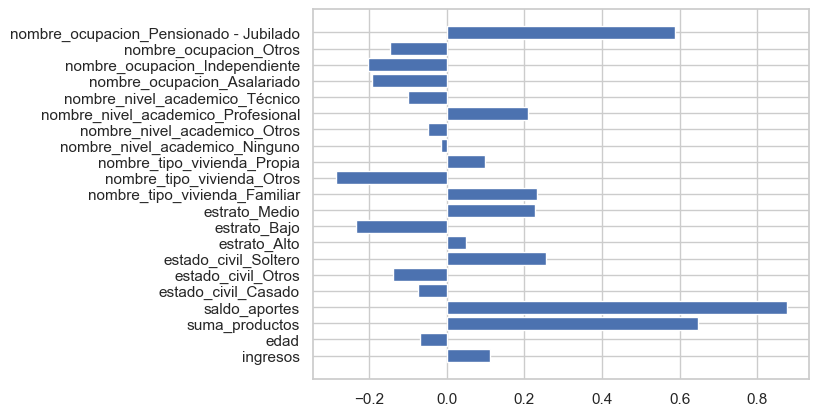

In [199]:
coeficientes = modelo.named_steps['clasificador'].coef_[0]

nombres_columnas = modelo.named_steps['procesamiento'].get_feature_names_out().tolist()
nombres_columnas = [col.replace('numerical__', '').replace('categorical__', '') for col in nombres_columnas]

df_coeficientes = pd.DataFrame({'Feature': nombres_columnas,
                                'Coef':coeficientes})
plt.barh(y = df_coeficientes['Feature'], width=df_coeficientes['Coef'])
plt.show()

# Hallazgos

### Factores Positivos (Mayor Probabilidad de Pago) 

* Saldo de Aportes (Coeficiente: 0.875777): Este es, por un amplio margen, el predictor más potente de pago. Un mayor saldo de aportes está fuertemente asociado con una mayor probabilidad de cumplir con la cuota. Esto sugiere que los asociados más comprometidos financieramente y con una mayor inversión en la cooperativa son los más fiables.

* Suma de Productos (Coeficiente: 0.648185): El segundo factor más influyente es la cantidad de productos que el asociado tiene con la cooperativa. Un mayor número de productos contratados (cuentas, créditos, etc.) aumenta significativamente la probabilidad de pago. Esto indica que los asociados más vinculados y que centralizan su actividad financiera en la cooperativa tienen un mejor comportamiento de pago.

* Ser Pensionado o Jubilado (Coeficiente: 0.588105): Los asociados que son pensionados o jubilados tienen una probabilidad de pago mucho más alta en comparación con otras ocupaciones. Esto probablemente se deba a la estabilidad y regularidad de sus ingresos, lo que les permite una mejor planificación financiera.

### Factores de Riesgo (Mayor Probabilidad de Impago)

* Tipo de Vivienda "Otros" (Coeficiente: -0.286458): Este es el factor de riesgo más elevado. Los asociados cuya vivienda se clasifica como "Otros" (lo que puede implicar inestabilidad residencial, como vivir en casas de familiares sin ser el dueño o en situaciones no convencionales) tienen la mayor probabilidad de no pagar. La falta de una vivienda estable (propia o familiar) es un claro indicador de riesgo.

* Estrato Bajo (Coeficiente: -0.233497): Pertenecer al estrato socioeconómico bajo es el segundo factor de riesgo más importante. Esto sugiere que las limitaciones presupuestarias y la menor capacidad de ingreso de este segmento dificultan el cumplimiento de sus obligaciones financieras de manera consistente.

* Ocupación Independiente (Coeficiente: -0.204585): Los trabajadores independientes presentan un riesgo de impago significativamente alto. Esto es comúnmente atribuido a la volatilidad e irregularidad de sus ingresos, lo que puede dificultar el pago puntual de cuotas fijas. Inmediatamente después se encuentran los Asalariados (-0.192594), quienes también presentan un riesgo mayor que los pensionados.